In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


Ways of without using PCA libraries

In [122]:
class_name = ['Setosa', 'Versicolor', 'Virginica']

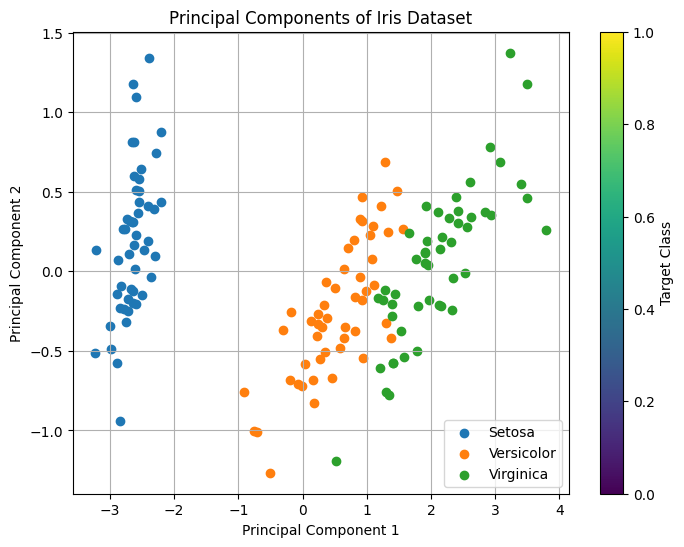

In [124]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Center the data
X_centered = X - np.mean(X, axis=0)
# 計算協方差矩陣
cov_matrix = np.cov(X_centered.T)

# 譜分解
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 將特徵向量排序
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# r1, c1 = eigenvalues.shape
# print(r1)
# 選擇主成分數量
k = 2
principal_components = eigenvectors[:, :k]
# 將數據投影到主成分上
projected_data = np.dot(X_centered , principal_components)
projected_data[:, 1] *= -1
# Plot the projected data
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(projected_data[y == i, 0], projected_data[y == i, 1], label=class_name[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components of Iris Dataset')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.legend()
plt.show()

X_pca shape:  150 2


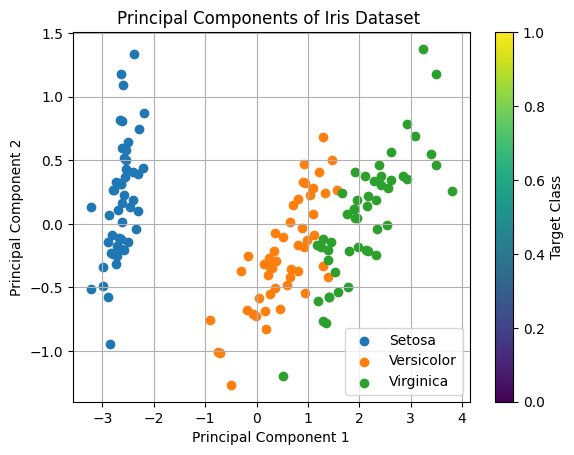

In [125]:
# 載入鳶尾花資料集
iris = load_iris()
X = iris.data
y = iris.target

# Center the data
X_centered = X - np.mean(X, axis=0)
# print(X_centered)

# 進行奇異值分解 (SVD)
U, S, Vt = np.linalg.svd(X_centered)

# 選取前兩個主成分
PC1 = Vt[:, 0]
PC2 = Vt[:, 1]

# 將資料投影到主成分空間
X_pca = X_centered.dot(Vt[ :2 , : ].T)
rowpca, colpca = X_pca.shape
print('X_pca shape: ', rowpca, colpca)
X_pca[:, 1] *= -1

# 繪製散點圖
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=class_name[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components of Iris Dataset ')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.legend()
plt.show()


In [126]:
print('U: ', U)
print('S: ', S)
print('Vt: ',Vt)
rowx, colx = X.shape
# rows, cols = S.shape
print(f'x shape : ',  rowx , colx)
# print(f's shape : ',  rows , cols)
rowu, colu = U.shape
rowv, colv = Vt.shape
print(f'u shape : ',  rowu , colu)
print(f'v shape : ',  rowv , colv)

U:  [[-1.06937444e-01 -5.31164840e-02  8.17734010e-03 ...  5.43380310e-02
   1.96438400e-03  2.46978090e-03]
 [-1.08133305e-01  2.94357038e-02  6.16531816e-02 ...  5.12936114e-03
   8.48544595e-02  5.83496936e-03]
 [-1.15099407e-01  2.41054172e-02 -5.24368218e-03 ...  2.75184277e-02
   1.78604309e-01  1.49419118e-01]
 ...
 [ 7.02927688e-02 -1.31144057e-02 -3.82231512e-02 ...  9.89532683e-01
  -1.25488246e-02 -7.17729676e-04]
 [ 7.57348450e-02 -1.93954931e-02 -2.11868549e-01 ... -1.41206665e-02
   9.52049996e-01 -2.32048811e-02]
 [ 5.53860977e-02  4.70071528e-02 -1.06310369e-01 ... -8.30595907e-04
  -2.19201906e-02  9.77300244e-01]]
S:  [25.09996044  6.01314738  3.41368064  1.88452351]
Vt:  [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
x shape :  150 4
u shape :  150 150
v shape :  4 4


# Use  PCA libraries


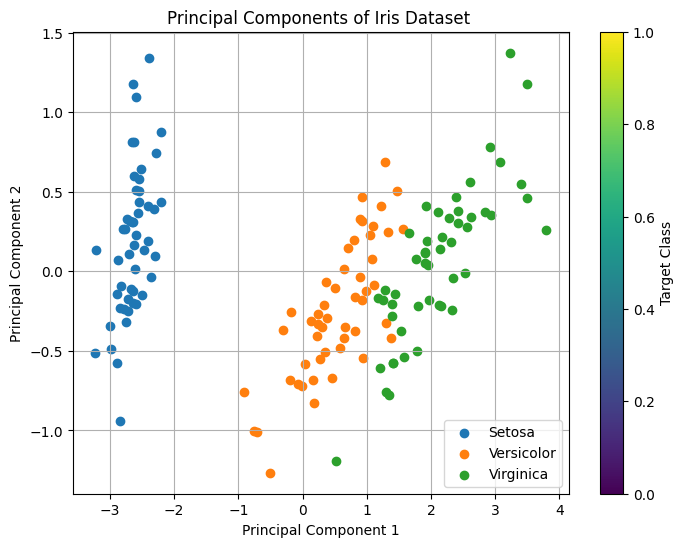

In [127]:
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the projected data
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=class_name[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components of Iris Dataset ')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.legend()
plt.show()
